# Supplementary Materials Lesson 2: Pandas!

We will now move on to Lesson 2! In IT1244, you have used NumPy for most of the data manipulation. It might be a little frustrating to use NumPy for data manipulation sometimes, and a lot of times I personally like to use Pandas.

# WORKFLOW:
This is how I taught my teammates on how to do EDA:
1. Looking at the data itself - using pd.describe(), pd.count(), pd.value_counts(),
2. Filling missing data - using pd.fillna() or pd.dropna()
3. Clean data - using pd.apply() or other stuff like that, basically grouping the data into categories
4. Visualize data - using matplotlib and seaborn

### Before we start:
- Make sure that pandas, matplotlib and seaborn is downloaded on your computer. You might want to use some numpy functions too, so make sure to download numpy. (If you don't know how to download pandas, just pip install pandas on your terminal)
- Do know that using pandas might be a little bit tough from the start, but don't be afraid! I'm here to help :)
- Do know that I'm cleaning this dataset to use in our other microlessons, so not only do you learn how to manipulate data with Pandas, you also get to see my thought process!

With that being said, let's start!

----------------

### Part 1: Reading and understanding data
Reading data is really, really simple. For the most part, you just want to make sure that your data is in the same folder as your repo for simple extraction. I have saved all the data I'm going to use in the data folder, so this is what I'm going to follow.

We need to our computer to read our data so that we can actually manipulate our data. But not only that, we need to understand our data so that we are able to see what to do to our data. For example, there will be numerical columns that are not numerical, and we have to convert the datatype to integer. There might also be some data that can be feature engineered into different features as well!

In [28]:
# First, we import our packages
import numpy as np 
import pandas as pd 

# We can then read the data. It really depends on your data, so do check out documentation for this
housing = pd.read_csv("data/housing.csv")
water = pd.read_csv("data/water_potability.csv")

# After that, we can check the first few columns of the dataset. We'll use housing
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
# We can get descriptive statistics of the datasets from the get go
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [30]:
# If you want to take a look at the data types of the variables, you can do that!

# Try this out with housing!
# housing.dtypes

water.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [31]:
# We can find the length of the dataset with len(dataset)
print(f"Length of housing dataset: {len(housing)}")

# Similarly, by using .count(), we can find the number of values that are present
# Subsequently, we can find the number of values that are missing.
print(f"Number of datapoints in each column for housing: \n{housing.count()} \n")

Length of housing dataset: 20640
Number of datapoints in each column for housing: 
longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64 



In [32]:
# We do the same for water
print(f"Length of water dataset: {len(water)}")
print(f"Number of datapoints in each column for water: \n{water.count()} \n")

Length of water dataset: 3276
Number of datapoints in each column for water: 
ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64 



We can tell that for both datasets, there are missing values. So according to our workflow, the second step is to fill up these missing values. However, there's more we need to understand of the data.

### Within the housing dataset:
- Most of the data is filled, so we will need to look further to see how exactly to fill the data.
- There is only 1 categorical variable, and we will try to deal with that later!
- It might not be clear, but median_house_value is our target value to predict, which makes it a regression problem.

### Within the water dataset:
- There are a lot lesser datapoints here, which is alright. Not a problem
- There are three columns with missing values: ph, sulfates and trihalomethanes.
- We can tell that everything is in floats except for Potability, which is in int. That is what we need to predict, which makes it a classification problem.

----------------

# Part 2: Filling missing data up.

Now that we know that there are missing data, let's talk about ways to fill them up. We will only introduce simple ways to fill them up, but know that there are a lot more advanced ways to fill data up. 

Use those algorithms at your own risk. You might have to explain them during Q&As. But basic methods are a lot more explainable. :)

We'll take a look at the water dataset first, before we go on with the housing dataset.

In [33]:
# We can select multiple columns using a list 

missing_data = water[["ph", "Sulfate", "Trihalomethanes"]]
missing_data.describe()

,ph,Sulfate,Trihalomethanes
count,2785.000000,2495.000000,3114.000000
mean,7.080795,333.775777,66.396293
std,1.594320,41.416840,16.175008
min,0.000000,129.000000,0.738000
25%,6.093092,307.699498,55.844536
50%,7.036752,333.073546,66.622485
75%,8.062066,359.950170,77.337473
max,14.000000,481.030642,124.000000


There are a lot of ways we can think about this right?

## Method 1: 
What if all of these datapoints are not meant to have values? It could mean that the water does not have these chemicals at all (for Sulfates and Trihalomethanes), and it could mean that for the datapoints with NA pH, it could be 0?

## Method 2:
What if all of these datapoints are meant to have values, but they're actually missing? Then what do we fill them up with? 

Let's do both ways, shall we? I personally prefer method 2, because pH being 0 doesn't make sense if the min value for pH is 0. But it's dependent on your way of understanding the data.

In [34]:
# Method 1

method_one = water.copy()

# The default way of filling NA values is fillna
# We put inplace = True, we don't need to save it for another variable.
method_one.fillna(0, inplace=True)
method_one.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [35]:
method_two = water.copy()
["ph", "Sulfate", "Trihalomethanes"]

# Should we fill this with median instead? Why or why not?
method_two["ph"].fillna(method_two["ph"].mean(), inplace = True)

# How about sulfates? Why median? 
method_two["Sulfate"].fillna(method_two["Sulfate"].median(), inplace = True)
method_two["Trihalomethanes"].fillna(method_two["Trihalomethanes"].median(), inplace = True)

method_two.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Now, you might be wondering what values to fill in with. For the most part:

- If 0 makes sense to us, we can fill it up with 0.
- We don't usually use the mode, but it might make sense depending on the context
- If we don't have outliers, then we can input the values with mean
- Otherwise, median is usually the safest choice!

Similarly, we can delete the datapoints, but think of it as a last resort, especially if your dataset is small!

In [36]:
# Let's take a look at the datapoints with the missing values, first!

# By the way, you can put in a condition inside square brackets and it will return you the subset.
missing_data = housing[housing['total_bedrooms'].isna()]
missing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


Ok, we realise that for this housing, there are a LOT of rooms. The minimum number of total_rooms are 154, which makes it seem like these are apartments. Maybe we can take a look at the subset where total_bedrooms is not missing, and total_rooms are perhaps more than 100.

In [37]:
# If we wanted to combine this, this is what we can do 
# ~ means not (or !=), & means and, | means or

# Remember to group your conditions properly!
# non_missing_data =  housing[(~housing['total_bedrooms'].isna()) & (housing['total_rooms'] <= 100)]

non_missing_data = housing[~housing['total_bedrooms'].isna()]
non_missing_data = housing[housing['total_rooms'] >= 100]
non_missing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Ok, this seems alright - 20514 datapoints with >= 100 rooms and values. This means that we might be able to use a simple machine learning algorithm to actually fit in the total_rooms for the missing data. We can use K Nearest Neighbours!

We'll cover more about how to use KNN to actually predict our results in the next lesson, but for this dataset, we're going to use a KNN imputer to impute our values. 

In [38]:
from sklearn.impute import KNNImputer

# We create the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Input the columsn needed for imputing
columns_to_impute = ['total_bedrooms']

# Create a copy of the DataFrame to preserve the original data
housing_imputed = housing.copy()  
housing_imputed[columns_to_impute] = imputer.fit_transform(housing_imputed[columns_to_impute])

housing_imputed.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

And we're done!

# Part 3: Cleaning data

We can do other things like feature engineering and things like that for our data! Let's focus specifically on the housing dataset, cause we might be able to do more feature engineering. I think the water dataset is okay!

In [39]:
# Let's say we want to create a new column, avg_household_members
# We can do so like this 
housing["avg_household_members"] = housing["population"] / housing["households"]

# Regressions are very sensitive to big values, so maybe we want to log our median_house_value
# How can we apply our function to a whole column?
housing["median_house_value"] = housing["median_house_value"].apply(np.log1p)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_household_members
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY,2.181467


## Dealing with categorical data

Oftentimes, we will have to deal with categorical data and give them a numerical number. We are able to do that with the pd.get_dummies function!

In [40]:
housing_with_dummies = pd.get_dummies(housing, columns=['ocean_proximity'], prefix='ocean')
housing_with_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_household_members,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,2.181467,0,0,0,1,0


We realise that we don't need to delete our "ocean_proximity" column, the function will do that for us!

However, there are some downsides to encoding:

1. Curse of dimensionality - this introduces more dimensions to your data, which will be a problem if your machine learning algorithms struggle with higher dimensions
2. Multicolinearity - this introduces high correlations because they represent the same information. This might be a problem in regression problems!

There are more downsides too, but the general rule of thumb is as long as it doesn't have too many dimensions, it's worth using pd.get_dummies! 

## Further reading:
Here are some other encoding methods:
1. [Label Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
2. [Ordinal Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
3. [Target Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html)

Do read up on what these methods do!

# Part 4: Visualisation!

Here, we visualise:
1. The correlation between the target variable and the other features
2. The variables themselves, just to see the range of values.

You can try this out with the water dataset, but I myself will be doing this with the housing dataset.

In [41]:
# Before we start, let me move the columns such that median_house_value is the last column
median_house_value = housing_with_dummies.pop('median_house_value')
housing_with_dummies['median_house_value'] = median_house_value


<Axes: >

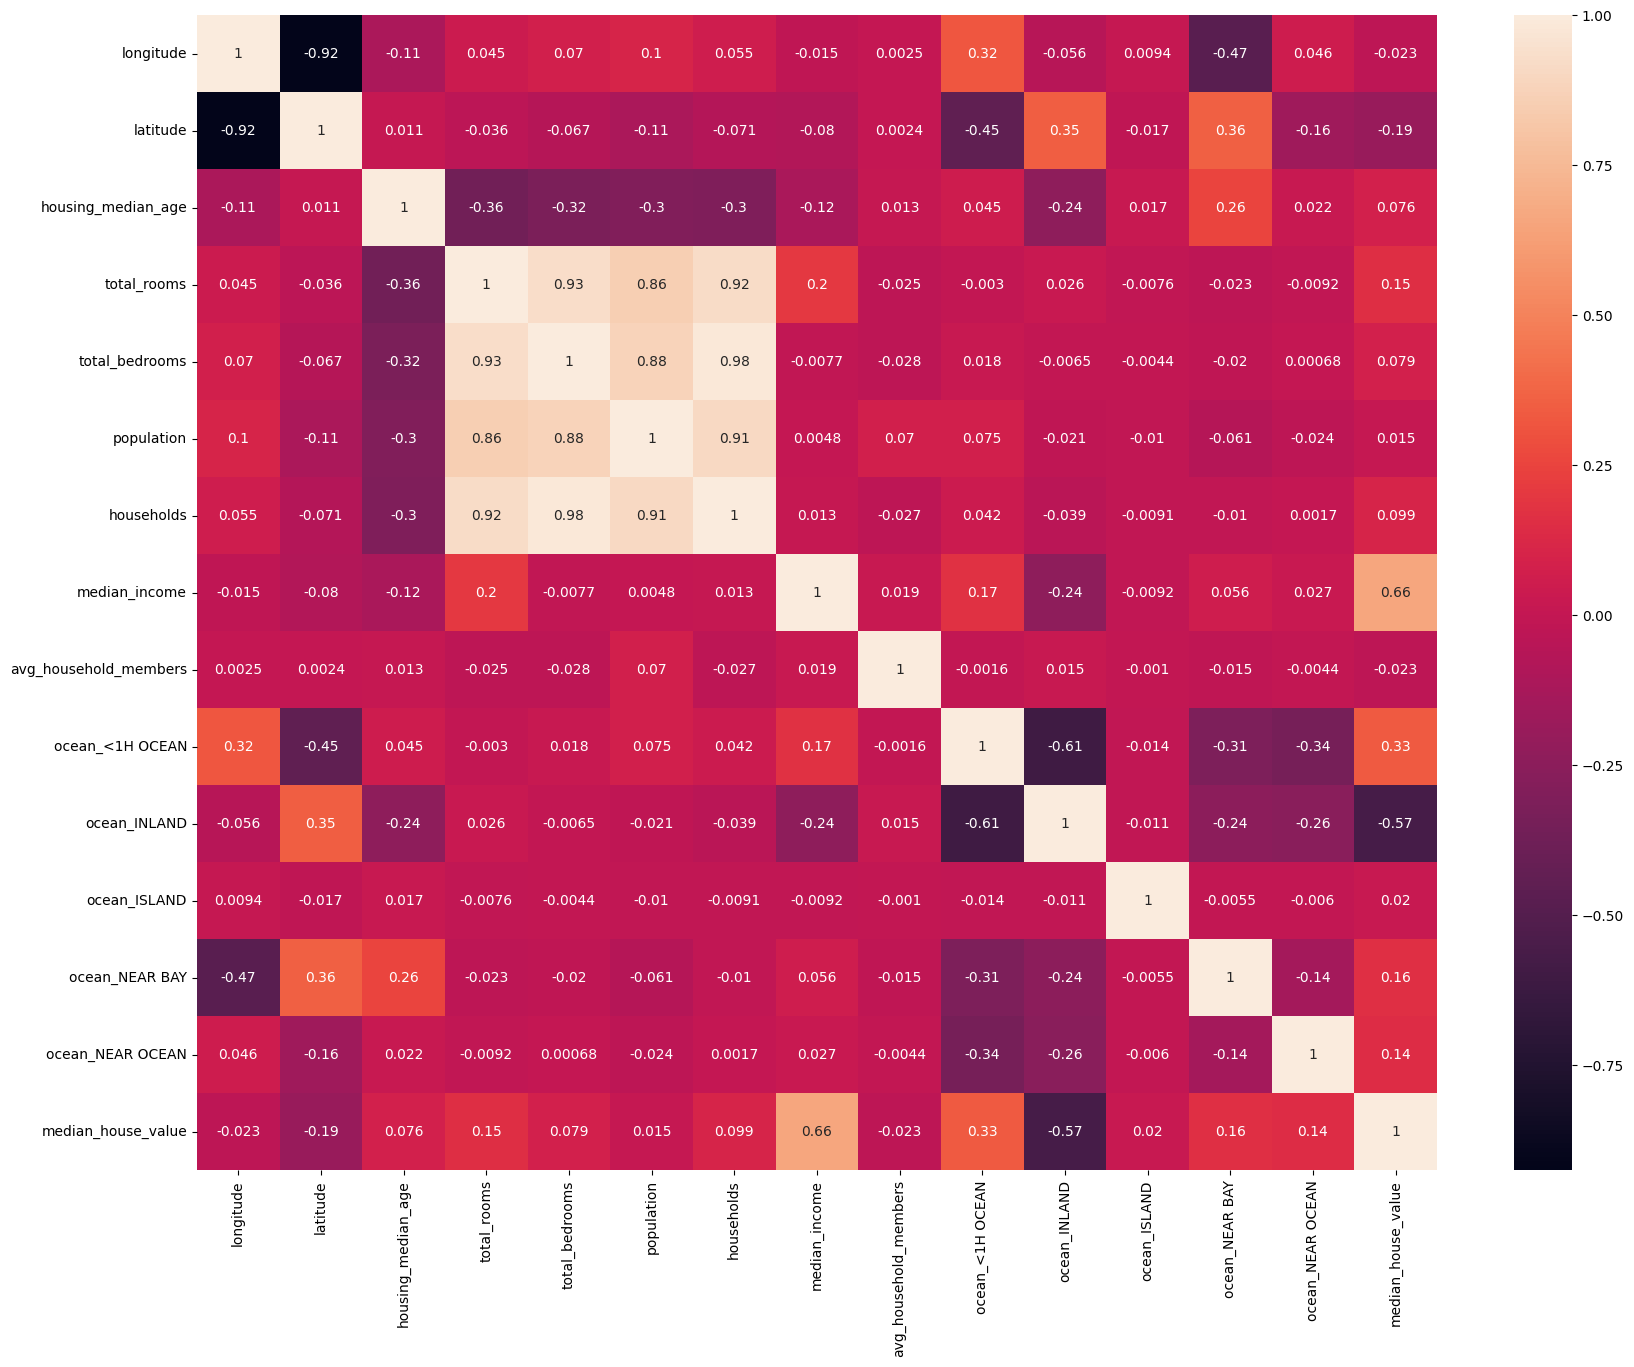

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns 


fig = plt.figure(figsize = (20,15))
sns.heatmap(housing_with_dummies.corr(), annot = True)

Derive some conclusions from this heatmap! 

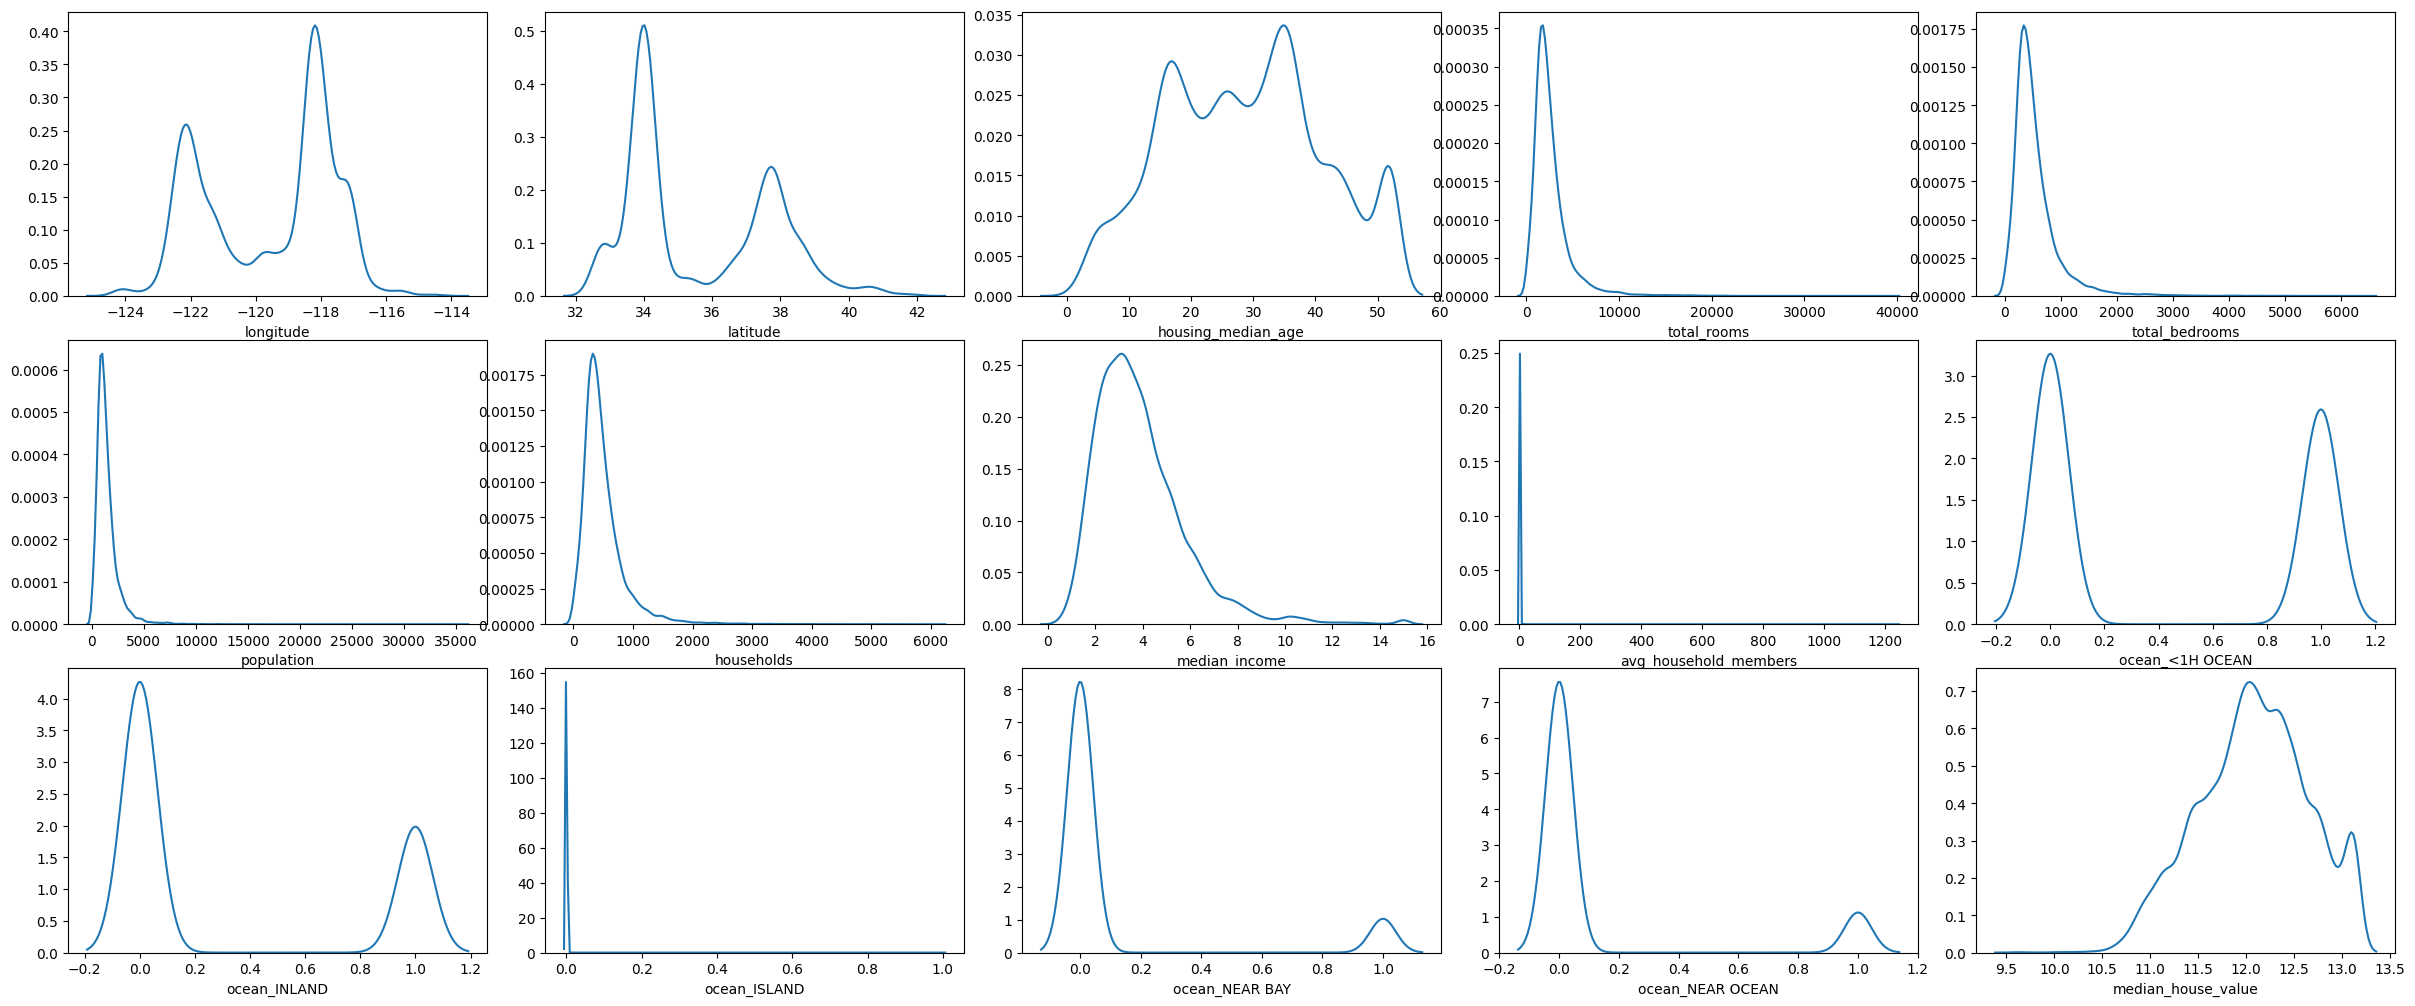

In [43]:
fig, axes = plt.subplots(3, 5, figsize=(24, 10))
plt.tight_layout()

for number, column in enumerate(housing_with_dummies.columns):
    row_index = number // 5  # Calculate the row index
    col_index = number % 5   # Calculate the column index

    plot_ax = axes[row_index, col_index]  # Select the appropriate subplot
    
    # Search this up!
    sns.kdeplot(x=column, data=housing_with_dummies, ax=plot_ax)
    plot_ax.set(ylabel='')

In [44]:
housing_with_dummies.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'avg_household_members', 'ocean_<1H OCEAN', 'ocean_INLAND',
       'ocean_ISLAND', 'ocean_NEAR BAY', 'ocean_NEAR OCEAN',
       'median_house_value'],
      dtype='object')

Firstly, do know that some of these columns should not have the kdeplot - namely the ocean columns. Don't actually use this for these kind of categorical columns, consider using a barplot instead. 

Secondly, we see that there are some columns that have a big range. Namely total_rooms, total_bedrooms, population and households. We will probably have to scale this, but we can do that later in our models.

In [45]:
# Final code - save these to .csv files!

housing_with_dummies.to_csv("data/housing_cleaned.csv")
method_two.to_csv("data/water_cleaned.csv")

Congratulations on going through the two longest lessons! Next one soon :) 